*This is a Jupyter Notebook. It is an interactive document that contains both rich text elements such as figures, links, equations, etc. and executable code (in this case Python code) contained in cells.
**Instructions:** You can run the notebook document step-by-step (execute one cell a time) by pressing shift + enter or
you can run the whole notebook in a single step by clicking on the menu Cell -> Run All.*

# How can we reach the equilibrium in a predator-prey habitat?
In this Notebook we will try to understand the evolution and interactions in a predator-prey habitat and how to reach the equilibrium of the prey and predator populations.For this purpose we will use a predator-prey model and Global Sensitivity Analysis (GSA).

# What is a predator-prey model?
A predator-prey model is a simplified representation of a predator-prey habitat. We consider two species. One species, the prey, is the primary source of food source for the other, the predator. The predator-prey food chain persists over time thanks to a **negative feedback loop**, i.e. when the product of a reaction leads to a decrease in that reaction. When predators eat preys, they reduce their population but this drop in the predators food source will soon cause the predator population to decline. This will also reduce the predation rate allowing the prey population to increase again. This cycle creates an up and down wavelike pattern that maintain a long-term equilibrium.

<left><img src="util/predator_prey_equil.gif" width="700px">

Now imagine that in a given natural habitat we would like to introduce a predator species to maintain the population of rabbits stable. For this purpose, we can select the initial number and species of predators as well as the initial number of rabbits. We could do this by trial and error by introducing different predator species and then monitoring the evolution of the populations but this will likely require high amounts of time, money and animal lives. But what if we could we simulate the habitat and its evolution on a computer using mathematical equations? 

A predator-prey model *(Ref. 1)* is a mathematical model (set of equations) describing the interactions that occur in a predator-prey habitat as a function of various parameters. These model parameters describe the characteristics of the habitat ultimately enabling the estimation of the evolution in time of the predator and prey populations. The parameters of our predator-prey model are the following:

- Predator initial population: initial number of predator individuals
- Predator attack rate: number of times that a predator sucessfully attacks (resulting in a kill) per week
- Predator efficiency: the factor describing the proportion of successful attacks that let create a new predator
- Predator death rate: fraction of the predator population that dies per week, for example by increasing or reducing the number of hunting licenses.
- Prey initial population: initial number of prey individuals

Let's assume that **optimal equilibrium** of the habitat is reached when both the predator and the prey populations are equal to **7000 ± 250 individuals each**.  To evaluate how close we are to this optimal equilibrium we compute the **equilibrium error**. The equilibrium error is the absolute difference between the predator population after 365 days and 7000 plus the absolute difference between the prey population after 365 days. Now, using the predator-prey model and changing the model parameters, let's try to reach the optimal equilibrium, i.e. try to put both lines (predator and prey populations) between the blue dashed lines before the end of the 365 days period. The blue dashed lines represents a population of 7000 ± 250 individuals.

In [1]:
from ipywidgets import widgets
from util.predator_prey_interactive import predator_prey_interactive

predator_ini,attack_rate,efficiency_rate,death_rate,prey_ini,growth_rate,carrying_capacity,fig1 = predator_prey_interactive()

widgets.VBox([widgets.VBox([predator_ini,attack_rate,efficiency_rate,death_rate,prey_ini],
                           layout=dict(border='solid',width = '750px',height = '180px')),fig1])

We can see that it is difficult to find the combination of parameters that reaches the defined equilibrium by varying one-at-a-time the values of the paraeters.

In order to facilitate the search for an optimal parameter combination we can apply Global Sensitivity Analysis (GSA). In this case, GSA can help to identify what parameters in our model have a relevant influence in the model results and what parameters can be neglected.

## Plot sensitivity indices and identify non-influential parameters
By applying GSA *(Ref. 2)* we obtain a sensitivity index for each model parameter that measures the relative influence of the parameter on the equilibrium error. Being the influence lower as the sensitivity index decreases. With GSA we can also obtain an influence threshold value for the sensitivity index. If the index of a parameter is below the threshold, then the parameter can be considered as uninfluential *(Ref. 3)*. Now run the cell below to obtain the sensitivity indices and the influence threshold (black dashed line).

In [2]:
from util.GSA_Predator_prey_model import screening,mapping

In [3]:
fig1 = screening()
widgets.VBox([fig1])

    'data': [{'line': {'color': 'rgba(120, 170, 150, 1)'},
              'mode':…

We observe that two of the parameters, predator initial population and prey initial population, have a low sensitivity index, being close or even below the influence threshold. Therefore we can neglect these parameters because they have a low influence in the model results.
## Investigate interactions between model parameters
Now only considering the influential parameters (predator attack rate, predator efficiency ratio and predator death rate) let's try to understand the interactions between to facilitate the search of an optimal combination of the values of these parameters (a combination that minimizes the equilibrium error). Using again GSA we plot one input against the other, coloured by the value taken by the model output (equilibrium error).

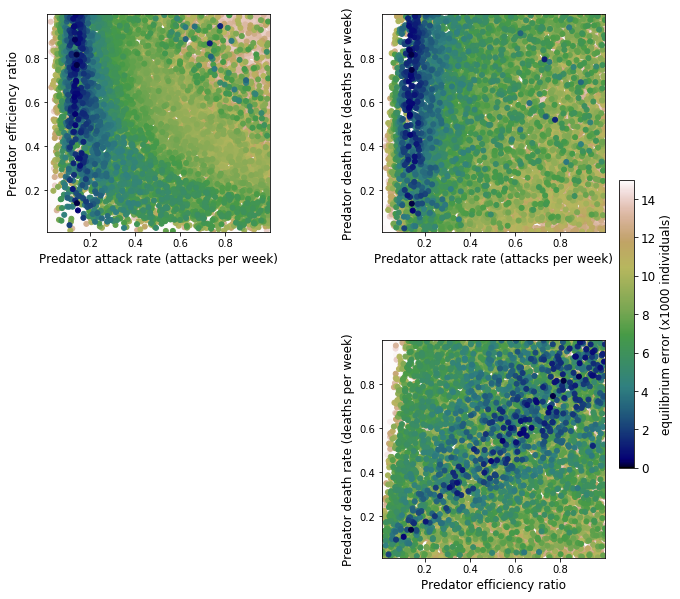

In [4]:
fig2 = mapping()

Can you identify a range of values for each of the parameters at which the equlibrium error gets minimum (blue dots)? Do you see a clear interaction between the Predator efficiency ratio and the Predator death rate? 

## Let's try to reach the habitat equilibrium again...
Now taking into account the interactions between model parameters try again to reach the **optimal equilibrium** of the predator and prey populations in **less than a year** by only **changing the value of the 3 more influential parameters**?

In [5]:
predator_ini,attack_rate,efficiency_rate,death_rate,prey_ini,growth_rate,carrying_capacity,fig1 = predator_prey_interactive()

widgets.VBox([widgets.VBox([predator_ini,attack_rate,efficiency_rate,death_rate,prey_ini],
                           layout=dict(border='solid',width = '750px',height = '180px')),fig1])

### References

1. [Predator-prey model - Hoppensteadt, F. (2006)](http://www.scholarpedia.org/article/Predator-prey_model)
2. [PAWN method - Pianosi and Wagener (2018)](https://doi.org/10.1016/j.envsoft.2018.07.019)
3. [Global Sensitivity Analysis . The primer - Saltelli et al. (2008)](http://www.andreasaltelli.eu/file/repository/A_Saltelli_Marco_Ratto_Terry_Andres_Francesca_Campolongo_Jessica_Cariboni_Debora_Gatelli_Michaela_Saisana_Stefano_Tarantola_Global_Sensitivity_Analysis_The_Primer_Wiley_Interscience_2008_.pdf) 